<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_03/CAP417_handson_03_EllenTuane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ellen Tuane

Institution: INPE.

Subject: Computational Statistics.

Date: 27 Mar. 2022.

What's hypotesis?
What's hypotesis test?

# 1. Population and Sample

# 1.1 What's population and Sample?

Population is the entire set of items from which you draw data for a statistical study.[1]

Sample represents the group of interest from the population, which you will use to represent the data. The sample is an unbiased subset of the population that best represents the whole data.

The process of collecting data from a small subsection of the population and then using it to generalize over the entire set is called Sampling.

Samples are used when :

*  The population is too large to collect data.
*  The data collected is not reliable.
*  The population is hypothetical and is unlimited in size. Take the example of a study that documents the results of a new medical procedure. It is unknown how the procedure will affect people across the globe, so a test group is used to find out how people react to it.

A sample should generally :

*  Satisfy all different variations present in the population as well as a well-defined selection criterion.
*  Be utterly unbiased on the properties of the objects being selected.
*  Be random to choose the objects of study fairly

# 1.2 Combinatorial analysis

In general, an arrangement of objects is simply a grouping of them. The number of "arrangements" of n items is given either by a combination (order is ignored) or permutation (order is significant).[3]

A set X of n elements is called an p- set; an s- subset of it, s≤p, is called a combination of size s. [2]

The number of arrangements of size s of p distinct elements when order is irrelevant is equal to

*  A(s,p)= s(s−1)…(s−p+1) = s!/ p!(s − p)!

For p=s an arrangement is a *permutation* of the elements of X, the number of such permutations being P(s)=s![2]. 

*  P(s,p) = s!/(s−p)!

 

# 1.3 Code

In [ ]:
from itertools import combinations
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/census.csv')

imported form census.csv the column age as a base for this experiment;
Then a sample of 10 ramdom ages were taken from this base as a population for this experiment.
The mean and standard deviation were calculated as inicial comparision points

In [ ]:
seed(1)

p = np.array(dataset['age'].sample(n = 10, random_state = 1))

print('p has: ', len(p), ' elements')
print('p mean is: ', np.mean(p))
print('p std deviation is: ', np.std(p))
p

p has:  10  elements
p mean is:  35.0
p std deviation is:  12.296340919151518


array([62, 18, 25, 33, 36, 34, 43, 47, 29, 23])

The library combinations from itertools was used to compute every combination, since the elements' order for this problem was not as important.
Below a function was created to return the mean and the standard deviation of every possible combinations given the number of elements.

In [ ]:
def combinations_mean(p, n_of_elements):
    sample = combinations(p, n_of_elements)
  
    samples_mean = []
    samples_std = []

    for s in sample:
        samples_mean.append(np.mean(s))
        samples_std.append(np.std(s))

    return samples_mean, samples_std

Possible combinations for samples of 20 to 90% were calculated

In [ ]:
samples_mean_two, samples_two_std = combinations_mean(p, 2)
samples_mean_three, samples_three_std = combinations_mean(p, 3)
samples_mean_four, samples_four_std = combinations_mean(p, 4)
samples_mean_five, samples_five_std = combinations_mean(p, 5)
samples_mean_six, samples_six_std = combinations_mean(p, 6)
samples_mean_seven, samples_seven_std = combinations_mean(p, 7)
samples_mean_eight, samples_eight_std = combinations_mean(p, 8)
samples_mean_nine, samples_nine_std = combinations_mean(p, 9)

Sample length were combined in on variable to plot a distribution

In [ ]:
data = [[20, len(samples_mean_two)], [30,len(samples_mean_three)],[40, len(samples_mean_four)], [50, len(samples_mean_five)],[60, len(samples_mean_six)],[70, len(samples_mean_seven)], [80, len(samples_mean_eight)]]


(0.0, 100.0)

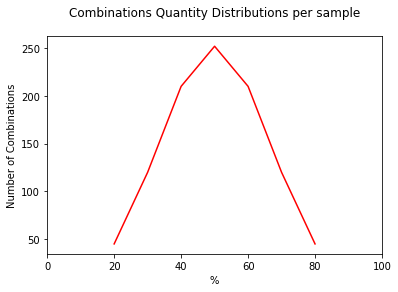

In [ ]:
df = pd.DataFrame(data, columns = ['%', 'Number_of_combinations'])
plt.xlabel("%")
plt.ylabel("Number of Combinations")
plt.title('Combinations Quantity Distributions per sample', pad=20)
plt.plot(df['%'], df['Number_of_combinations'],color='red')
plt.xlim(0, 100)

Conclusion:  a normal distribution was noticed. Possible combinations raised from 45 on 20% to 250 on 50%, and droped on the 80% to again 45. It was possible due to the range of elements in that combination.

Funciton to plot the mean and std deviation were criated

In [ ]:
# asx = which position in the image display the graph
# title = title of that specific graph
# x = independent variable, x axis
# fn = function for that line, curve, distribution

def plotFn(axs, title, sample, x_label):
    # set data
    bins = 5
    axs.hist(sample, bins, density=True, color ='indianred')
    
    # set text box
    s_mu = np.mean(sample)
    median = np.median(sample)
    sigma = np.std(sample)
    lenth = len(sample)
    textstr = '\n'.join((r'$\mu=%.0f$' % (s_mu, ), r'$\mathrm{median}=%.2f$' % (median, ), r'$\sigma=%.2f$' % (sigma, ), r'qdt=%.0f' % (lenth, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs.text(1, 0.5, textstr, transform=axs.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)  
    axs.axvline(s_mu, color='k', linestyle='dashed', linewidth=1)

    #Set bottom and left spines as x and y axes of coordinate system
    axs.spines['bottom'].set_position('zero')
    axs.spines['left'].set_position('zero')
    
    #Remove top and right spines
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['left'].set_visible(False)
    
    #Create 'x' labels placed at the end of the axes
    axs.set_xlabel(x_label, size=14)

    # set y axes as empity
    axs.set_yticks([])

    # set x limits
    axs.set_xlim(20, 60)

    # set title
    axs.set_title(title, pad=20)
    return

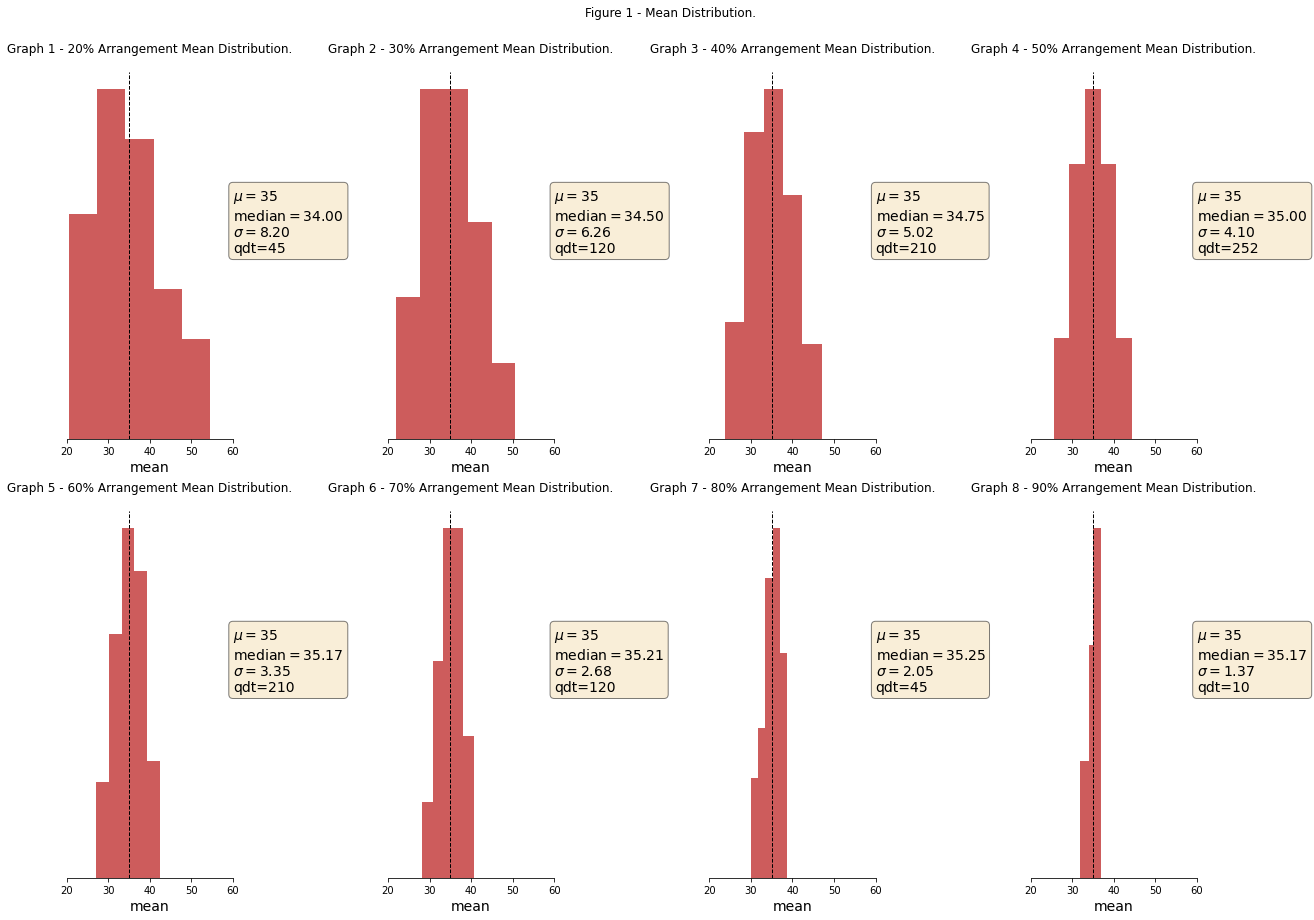

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(18,13)) #rows = 2, cols = 4

plotFn(axs[0][0],"Graph 1 - 20% Arrangement Mean Distribution.",samples_mean_two, 'mean')
plotFn(axs[0][1],"Graph 2 - 30% Arrangement Mean Distribution.",samples_mean_three, 'mean')

plotFn(axs[0][2],"Graph 3 - 40% Arrangement Mean Distribution.",samples_mean_four, 'mean')
plotFn(axs[0][3],"Graph 4 - 50% Arrangement Mean Distribution.",samples_mean_five, 'mean')

plotFn(axs[1][0],"Graph 5 - 60% Arrangement Mean Distribution.",samples_mean_six, 'mean')
plotFn(axs[1][1],"Graph 6 - 70% Arrangement Mean Distribution.",samples_mean_seven, 'mean')

plotFn(axs[1][2],"Graph 7 - 80% Arrangement Mean Distribution.",samples_mean_eight,'mean')
plotFn(axs[1][3],"Graph 8 - 90% Arrangement Mean Distribution.",samples_mean_nine,'mean')

fig.suptitle("Figure 1 - Mean Distribution.")

fig.tight_layout()
fig.subplots_adjust(top=0.91)

plt.show()

from 20 to 40% a positive skew can be noticed, 50 and 60% arrangement has the closest to a normal distribuiton, and finally 70 to 90% has a negative skew. This can be afirmed when relation the median and the mean for each specific distribuiton above. Normal distributions tend to have the same value for mean and media. If median differs from the mean tendind to a lower number, it can be called possitive skew and the oppisite is called negative skew.

In [ ]:
def plotSdt(axs, title, sample, x_label):
    # set data
    bins = 10
    axs.hist(sample, bins, density=True, color ='indianred')
    
    # set text box
    mu = np.mean(sample)
    median = np.median(sample)
    sigma = np.std(sample)
    lenth = len(sample)
    textstr = '\n'.join((r'$\mu=%.0f$' % (mu, ), r'$\mathrm{median}=%.2f$' % (median, ), r'$\sigma=%.2f$' % (sigma, ), r'qdt=%.0f' % (lenth, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs.text(1, 0.5, textstr, transform=axs.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)  
    axs.axvline(mu, color='k', linestyle='dashed', linewidth=1)

    #Set bottom and left spines as x and y axes of coordinate system
    axs.spines['bottom'].set_position('zero')
    axs.spines['left'].set_position('zero')
    
    #Remove top and right spines
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['left'].set_visible(False)
    
    #Create 'x' labels placed at the end of the axes
    axs.set_xlabel(x_label, size=14)

    # set y axes as empity
    axs.set_yticks([])

    # set x limits
    axs.set_xlim(0, 20)

    # set title
    axs.set_title(title, pad=20)
    return

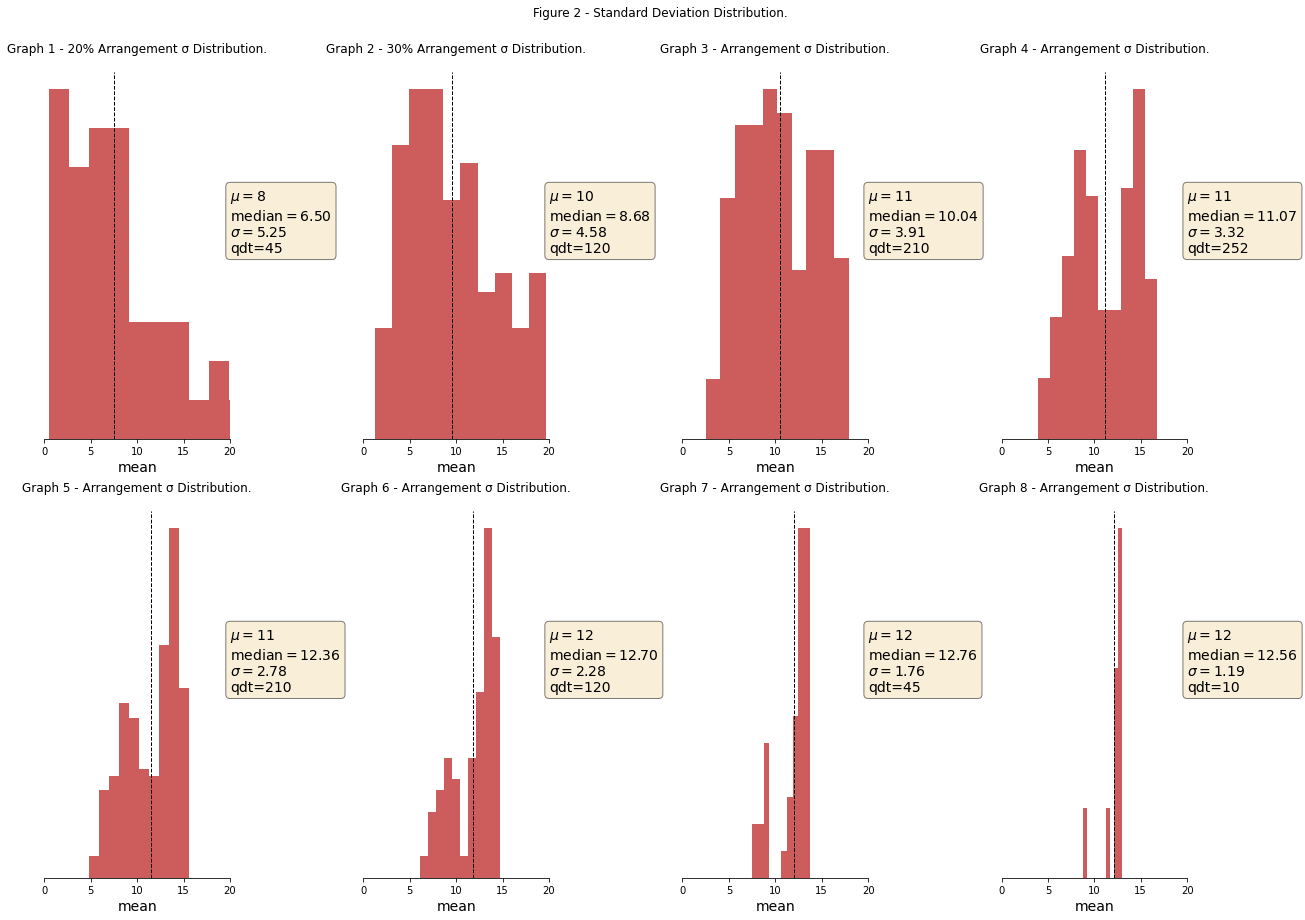

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(18,13)) #rows = 2, cols = 4

plotSdt(axs[0][0],"Graph 1 - 20% Arrangement σ Distribution.",samples_two_std, 'mean')
plotSdt(axs[0][1],"Graph 2 - 30% Arrangement σ Distribution.",samples_three_std, 'mean')

plotSdt(axs[0][2],"Graph 3 - Arrangement σ Distribution.",samples_four_std, 'mean')
plotSdt(axs[0][3],"Graph 4 - Arrangement σ Distribution.",samples_five_std, 'mean')

plotSdt(axs[1][0],"Graph 5 - Arrangement σ Distribution.",samples_six_std, 'mean')
plotSdt(axs[1][1],"Graph 6 - Arrangement σ Distribution.",samples_seven_std, 'mean')

plotSdt(axs[1][2],"Graph 7 - Arrangement σ Distribution.",samples_eight_std,'mean')
plotSdt(axs[1][3],"Graph 8 - Arrangement σ Distribution.",samples_nine_std,'mean')

fig.suptitle("Figure 2 - Standard Deviation Distribution.")

fig.tight_layout()
fig.subplots_adjust(top=0.91)

plt.show()

The same is noticed on the std deviation plot


In [ ]:
boxplot_data = [samples_mean_two, samples_mean_three, samples_mean_four, samples_mean_five, samples_mean_six, samples_mean_seven, samples_mean_eight, samples_mean_nine]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


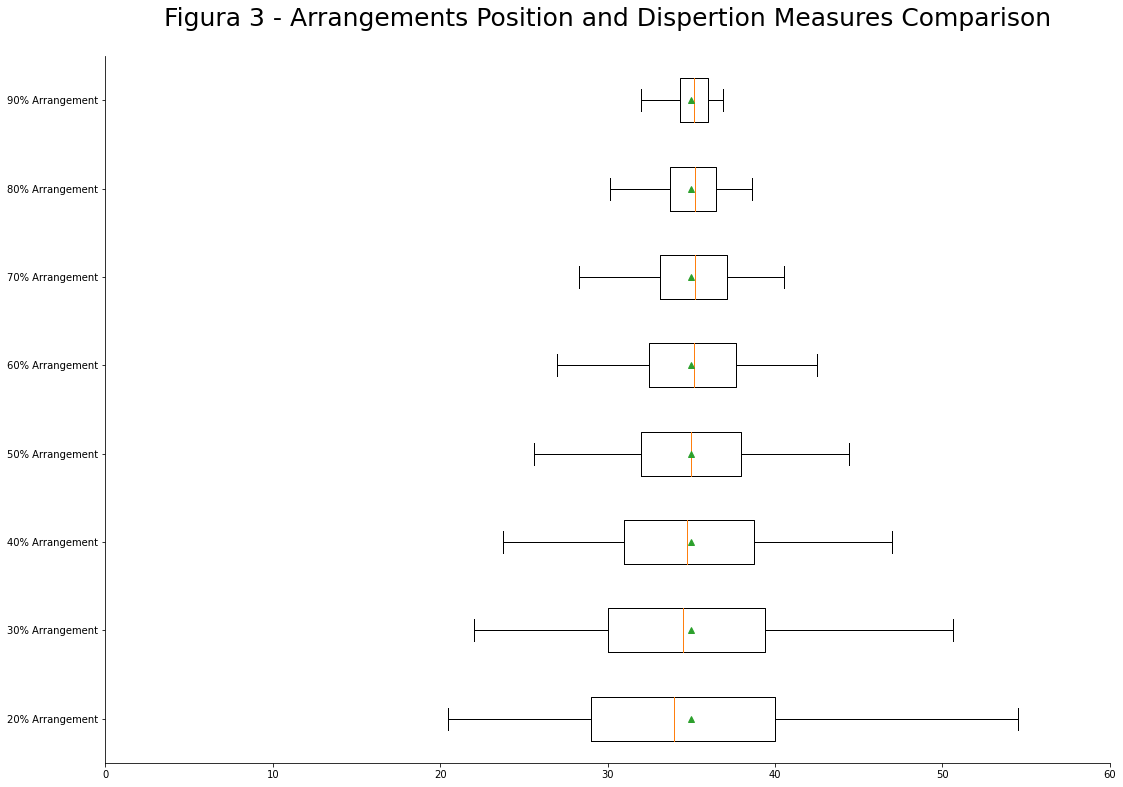

In [ ]:
fig, ax = plt.subplots(figsize=(18,13)) 
0
labels = ['20% Arrangement', '30% Arrangement', '40% Arrangement', '50% Arrangement', '60% Arrangement', '70% Arrangement', '80% Arrangement', '90% Arrangement']

ax.boxplot(boxplot_data, vert=0, showmeans=True, labels=labels)

        
#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlim(0, 60)
plt.title('Figura 3 - Arrangements Position and Dispertion Measures Comparison', pad=30, size=25)

plt.show()

The median differing form de mean is also noticed on the boxplot above. It is possible to analyse the min and max on this plot, which the min and max tend to narrow when reasing the number of elementes for each particular combination in the sampling. What it means is that when comparing, for example, the 80% arrangemente mean with the 20%, the 80% ararngement combination mean does not have much variation. 

# 2. 

In [ ]:
from scipy.stats import norm
from scipy import stats
import math


dados = np.random.normal(loc = 186, scale = 12, size=25)
n = len(dados)
media = np.mean(dados)
desvio_padrao = np.std(dados)

stats.sem(dados)
desvio_padrao / math.sqrt(n - 1)
intervalos = norm.interval(0.95, media, stats.sem(dados))
margem_erro = media - intervalos[0]

intervalos

(180.6816946332862, 191.01278806639817)

# References:

[1] Population vs Sample: Definitions, Differences and Examples. SimpleLearning, 2022. Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/population-vs-sample. Accessed on: 25 Mar, 2022.

[2] Combinatorial Analysis. Encyclopedia of Mathematics. Available at: http://encyclopediaofmath.org/index.php?title=Combinatorial_analysis&oldid=46400. Accessed on: 26 Mar, 2022.

[3] Combinations and Permutations. Math is fun. Available at: https://www.mathsisfun.com/combinatorics/combinations-permutations.html. Accessed on: 26 Mar, 2022.

[4] API reference: A normal continuous random variable. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html Accessed on: 27 Mar, 2022.

[5] API refetence: Boxplot lib. Available at: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html. Accessed on: 27 mar, 2022.